In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

from sys import path
path.append('..')
import numpy as np
import os
import cv2
from sklearn.datasets import load_breast_cancer # binaryclass
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#%run /content/drive/MyDrive/ImageProcess.ipynb

In [5]:
part_human = '/content/drive/MyDrive/AI/human_data_for_classification/Human'
part_non_human = '/content/drive/MyDrive/AI/human_data_for_classification/Non-Human'

In [6]:
ones_human = np.ones((28*28, 1)).reshape(1, -1)
for file in os.listdir(part_human):
  path_img_human = part_human+'/'+file
  image_human = cv2.imread(path_img_human, 0)
  image_human = cv2.resize(image_human, (28, 28)).reshape(1, -1)
  ones_human = np.vstack((ones_human, image_human))

data_human = np.delete(ones_human, 0, 0) 
N, d = data_human.shape
print(N,d)
ones_non_human = np.ones((28*28, 1)).reshape(1, -1)
for file in os.listdir(part_non_human):
  path_img_non_human = part_non_human+'/'+file
  image_non_human = cv2.imread(path_img_non_human, 0)

  image_non_human = cv2.resize(image_non_human, (28, 28)).reshape(1, -1)
  ones_non_human = np.vstack((ones_non_human, image_non_human))

data_non_human = np.delete(ones_non_human, 0, 0)

feature_set = np.vstack((data_human,data_non_human))
feature_set = feature_set/255

label_ones = np.ones((2712, 1))
label_zeros = np.zeros((2472, 1))

# label_ones = np.ones((20, 1))
# label_zeros = np.zeros((20, 1))

targets = np.vstack((label_ones, label_zeros))

X, X_test, Y, Y_test = train_test_split(feature_set, targets, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)


2712 784


In [7]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
X_train = X_train.reshape(X_train.shape[0], 28, 28, -1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [8]:
# 4. One hot encoding label (Y)
Y_train = np_utils.to_categorical(Y_train, 2)
Y_val = np_utils.to_categorical(Y_val, 2)
Y_test = np_utils.to_categorical(Y_test, 2)

In [9]:
model = Sequential()
 
# Thêm Convolutional layer với 32 kernel, kích thước kernel 3*3
# dùng hàm sigmoid làm activation và chỉ rõ input_shape cho layer đầu tiên
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))

# Thêm Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))

# Thêm Max pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer chuyển từ tensor sang vector
model.add(Flatten())

# Thêm Fully Connected layer với 128 nodes và dùng hàm sigmoid
model.add(Dense(128, activation='sigmoid'))

# Output layer với 10 node và dùng softmax function để chuyển sang xác xuất.
model.add(Dense(2, activation='softmax'))

In [10]:
filepath = '/content/drive/MyDrive/model'
model = load_model(filepath)

In [11]:
# 6. Compile model, chỉ rõ hàm loss_function nào được sử dụng, phương thức 
# đùng để tối ưu hàm loss function.
model.compile(loss='binary_crossentropy', # binary since we are working with 2 clases (0 & 1)
                optimizer='adam',
                metrics=['accuracy'])

In [12]:
# 7. Thực hiện train model với data
H = model.fit(X_train, Y_train, validation_data=(X_val, Y_val),
          batch_size=32, epochs=10, verbose=1)

Epoch 1/10
104/104 [==============================] - 12s 7ms/step - loss: 0.0093 - accuracy: 0.9982 - val_loss: 0.0130 - val_accuracy: 0.9976
Epoch 2/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 0.9988 - val_loss: 0.0078 - val_accuracy: 0.9988
Epoch 3/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9988
Epoch 4/10
104/104 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.9988
Epoch 5/10
104/104 [==============================] - 0s 5ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 0.9988
Epoch 6/10
104/104 [==============================] - 0s 5ms/step - loss: 8.7592e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9988
Epoch 7/10
104/104 [==============================] - 0s 5ms/step - loss: 7.8392e-04 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 0.99

In [13]:
model.save('/content/drive/MyDrive/model')

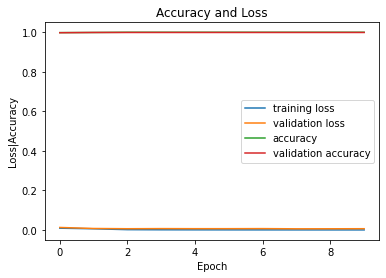

In [14]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [15]:
# 9. Đánh giá model với dữ liệu test set
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.003073709085583687, 1.0]


Giá trị dự đoán:  1


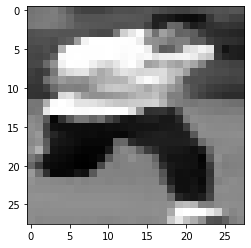

In [16]:
# 10. Dự đoán ảnh
plt.imshow(X_test[5].reshape(28,28), cmap='gray')

y_predict = model.predict(X_test[5].reshape(1,28,28,1))
print('Giá trị dự đoán: ', np.argmax(y_predict))